<a href="https://colab.research.google.com/github/Eunjung-Cho/Ai_study/blob/main/week6/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_06_PCA_%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 - PCA 주성분분석

<img width="20%" src="https://i.imgur.com/wjKqltP.png" >
   

**2019-2021 FinanceData.KR http://facebook.com/financedata**

# 차원의 저주(Curse of dimensionality)
* 데이터의 양과 차원은 아주 밀접한 관련
* 차원이 증가하면 데이터를 표현하기 위한 데이터 양이 기하급수적으로 증가

<img src="https://i.imgur.com/BzEa6PR.png" >
데이터가 차원의 증가에 따라 얼마나 많이 필요한지에 대한 표현

https://eranraviv.com/curse-of-dimensionality/

    
<img src="https://i.imgur.com/AZq1Ymg.png" >

일정 차원을 넘으면 분류기의 성능은 점점 떨어져 0으로 수렴


# 차원 축소 Dimensionality Reduction
* 데이터의 의미를 잘 표현하는 feature를 추출
* 더 적은 수의 feature로 데이터를 표현

<img width="50%" src="https://i.imgur.com/e2k1Xez.png" > wikipedia.org

* x, y 축보다 화살표 축이 데이터를 더 잘 표현(주성분)
* 주성분=분산이 가장 큰 방향 벡터


# 차원 축소의 필요
* 계산 비용, 불필요한 변수
* 노이즈 제거
* 시각화(결과를 쉽게 이해)

# 변수 선택과 추출 (장점/단점)
비교 | 변수 선택(selection) | 변수 추출(extraction)
--- | ----- | ----------
방법 | 목적에 부합하는 예측 변수를 선택 | 예측 변수를 변환하여 새로운 변수 생성
장점 | 선택한 변수 해석 용이  | 변수간 상관관계 고려, 변수의 개수 대폭 축소
단점 | 변수간 상관관계 무시 | 추출된 변수 해석이 어려움

# 변수 선택과 추출 (Supervised / Unsupervised)

알고리즘 | 변수 선택(selection) | 변수 추출(extraction)
--- | ----- | ----------
Supervised | Information gain,<br>LASSO | PLS (partial least squares)
Unsupervised | PCA loading | PCA, <br>AutoEncoder

# 주요 차원 축소 알고리즘

* PCA (Principal component analysis)
* SVD (Singular-value decomposition)
* NMF (Non-negative Matrix Factorization)

# PCA 개요
고차원의 데이터를 저차원의 데이터로 환원시키는 기법 

* p개의 변수를 상관관계가 없는 k개의 변수로 요약 (k << p)
* 요약된 변수는 기존 변수의 선형조합으로 생성, n개의 관측치의 개수를 그대로
* 원래 데이터의 분산을 최대한 보존하는 축을 찾고, 그 축에 project
* 활용: 차원축소, 시각화, 군집화, 압축 등

# PCA 과정
1. 데이터 집합에 대해 공분산 행렬 구하기
1. 공분산 행렬에서 고유값과 고유벡터 구하기
1. 고유값 목록에서 값이 큰 k개 인덱스 구하기 

https://youtu.be/FhQm2Tc8Kic?t=3067

동영상 좀 더 상세히
    
# PCA 알고리즘 요약
1. 데이터 졍규화
1. 기존 변수의 covriance matrix 계산
1. covriance matrix로 부터 eigenvalue, eigenvector 계산
1. eigenvalue와 eigenvector 순서대로 나열
1. 정렬된 eigenvector를 기반으로 기본 변순 변환

# 고유 벡터(eigenvector)

벡터 T에 대해,
$$ Tv=\lambda v $$

를 만족시키면, v를 T의 고유 벡터라고 하고, $\lambda$ 를 T (v에 대응하는) 고윳값이라고 한다.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set1", 8, .75)
# palplot(sns.color_palette("hls", 8))

In [ ]:
import pandas as pd

data = [
    [1200, 1, 0, 0, 2, 'bad'],
    [2800, 1, 1, 1, 1, 'normal'],
    [3500, 2, 2, 1, 0, 'good'],
    [1400, 0, 1, 0, 3, 'bad'],
    [5000, 2, 2, 2, 0, 'good'],
    [1300, 0, 0, 1, 2, 'bad'],
    [3000, 1, 0, 1, 1, 'normal'],
    [4000, 2, 2, 2, 0, 'good'],
    [2600, 0, 2, 0, 0, 'normal'],
    [3000, 1, 2, 1, 1, 'good'],
]

df = pd.DataFrame(data, columns=['A1', 'F1', 'F2', 'F3', 'F4', 'perf'])
df

,A1,F1,F2,F3,F4,perf
0,1200,1,0,0,2,bad
1,2800,1,1,1,1,normal
2,3500,2,2,1,0,good
3,1400,0,1,0,3,bad
4,5000,2,2,2,0,good
5,1300,0,0,1,2,bad
6,3000,1,0,1,1,normal
7,4000,2,2,2,0,good
8,2600,0,2,0,0,normal
9,3000,1,2,1,1,good


In [ ]:
X = df[['A1', 'F1', 'F2', 'F3', 'F4']]
Y = df[['perf']]

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(X.astype(float))

In [ ]:
# feature들의 Covariance Matrix 만들기
import numpy as np

features = x.T
cov_mat = np.cov(features)
cov_mat

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [ ]:
# covariance matrix 이용해 Eigen Value의 최대값인 Eigen Vector (PC) 구하기
# feature가 5개, eigen_vector도 5개

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
eig_vals

array([4.0657343 , 0.8387565 , 0.07629538, 0.27758568, 0.2971837 ])

In [ ]:
eig_vecs

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [ ]:
# 처음 1개만 사용 (5차원 -> 1차원)
# 비율값 = 정보의 유지 (70% 유지)

eig_vals[0] / sum(eig_vals)

0.7318321731427545

In [ ]:
# 각 컬럼 데이터들을 아이겐벡터에 프로젝션
proj_X = x.dot(-eig_vecs.T[0])
proj_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


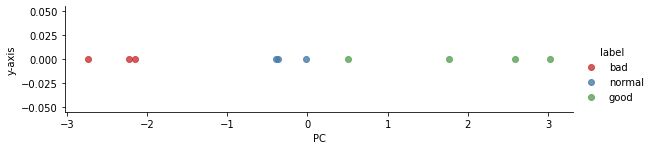

In [ ]:
# 5차원 --> 1차원, 시각화
result = pd.DataFrame(proj_X , columns=['PC'])
result['y-axis'] = 0.0
result['label'] = Y

sns.lmplot('PC', 'y-axis', data=result, fit_reg=False, hue="label", height=2, aspect=4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


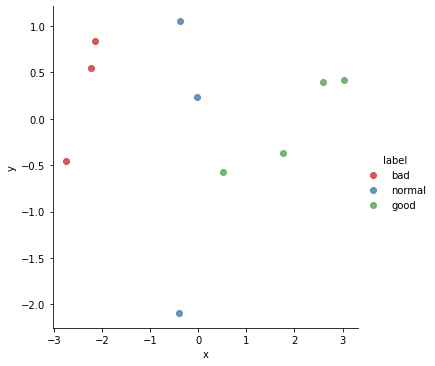

In [ ]:
# 5차원 --> 2차원, 시각화
proj_X = x.dot(-eig_vecs.T[0])
proj_Y = x.dot(-eig_vecs.T[1])

result = pd.DataFrame({'x': proj_X, 'y': proj_Y} )
result['label'] = Y

sns.lmplot('x', 'y', data=result, fit_reg=False, hue="label")

# Scikit-learn PCA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


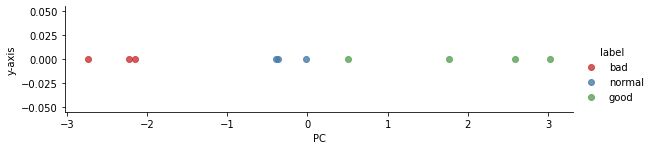

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
res = pca.fit_transform(x)

result = pd.DataFrame(res, columns=['PC'])
result['y-axis'] = 0.0
result['label'] = Y
sns.lmplot('PC', 'y-axis', data=result, fit_reg=False, hue="label", height=2, aspect=4) # color

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


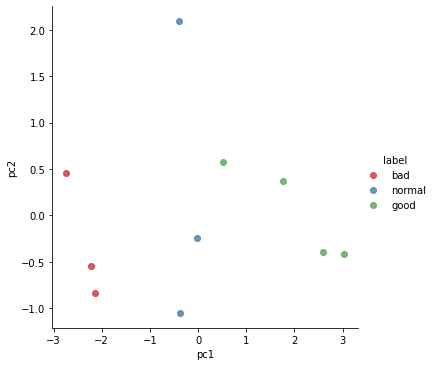

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
res = pca.fit_transform(x)

result = pd.DataFrame(res, columns=['pc1', 'pc2'])
result['label'] = Y
sns.lmplot('pc1', 'pc2', data=result, fit_reg=False, hue="label") # color

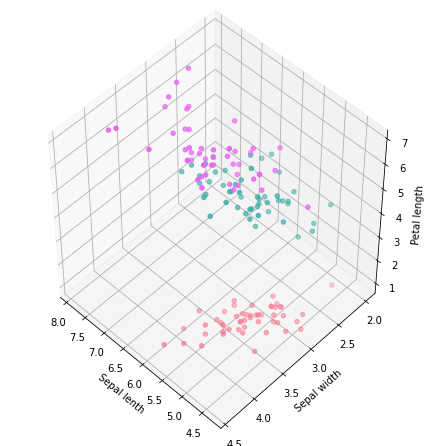

In [ ]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import matplotlib as mpl

cmap = mpl.colors.ListedColormap(sns.color_palette("husl"))

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=['Sepal length','Sepal width','Petal length','Petal width'])

fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=iris.target, cmap=cmap)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [ ]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

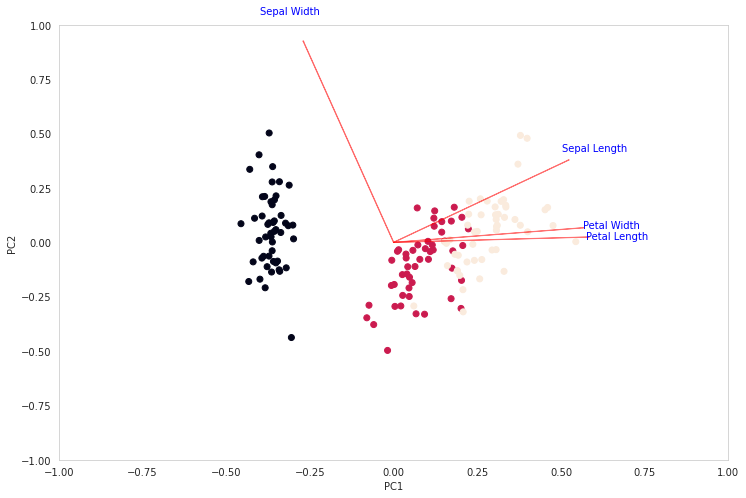

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("GnBu", 8, .75)

iris = datasets.load_iris()
X = iris.data
y = iris.target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c=y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='b', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'b', ha='center', va='center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
labels = [
    'Sepal Length', # 꽃받침의 길이
    'Sepal Width', # 꽃받침의 너비
    'Petal Length', # 꽃잎의 길이
    'Petal Width', # 꽃잎의 너비
]

myplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), labels=labels)
plt.show()

In [ ]:
# singular value
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [ ]:
# singular vector
pca.components_.T

array([[ 0.52106591,  0.37741762, -0.71956635, -0.26128628],
       [-0.26934744,  0.92329566,  0.24438178,  0.12350962],
       [ 0.5804131 ,  0.02449161,  0.14212637,  0.80144925],
       [ 0.56485654,  0.06694199,  0.63427274, -0.52359713]])

In [ ]:
# eigen_value
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
# explained variance ratio
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

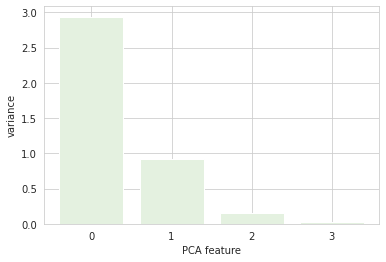

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

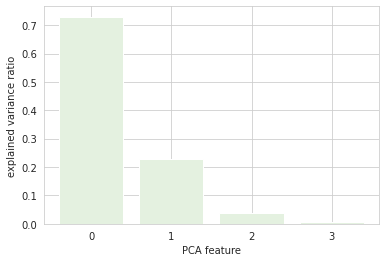

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('explained variance ratio')
plt.xticks(features)
plt.show()

# 몇 차원으로 줄일 것인가?

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

pca.explained_variance_ratio_ 값으로 적절한 차원 선택

선택차원 | 설명력
--- | ----
1 | 72.96%
2 | 95.81%
3 | 99.48%
4 | 100.0%



**2019-2021 FinanceData.KR http://facebook.com/financedata**